In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r"C:\Users\91994\Desktop\My Practice\Football_Data_Merged_Cleaned.csv")

## Descriptive Analysis: Attendance Data
### Business Question 1: What is the average attendance at matches across all teams?

In [6]:
# Calculate the average attendance across all teams
average_attendance = df['attendance'].mean()
print(f"Average attendance across all teams: {average_attendance}")

Average attendance across all teams: 29044.67425870219


#### Average Attendance Across All Teams
#### The average attendance of 29,045 indicates a moderately strong fan turnout across all teams.
#### This suggests that, on average, matches attract a significant number of spectators, likely influenced by factors such as the league's popularity, team performance, or cultural importance of football in the region.


### Business Question 2: Which team has the highest attendance?

In [7]:
# Find the team with the highest attendance
max_attendance_team = df.loc[df['attendance'].idxmax()]
print(f"Team with the highest attendance: {max_attendance_team['home_club_name']} with attendance {max_attendance_team['attendance']}")

Team with the highest attendance: Borussia Dortmund with attendance 81365.0


#### Interpretation:
#### Borussia Dortmund has the highest attendance of 81,365, showcasing their exceptional fanbase and engagement.

### Business Question 3: Business Question:What is the relationship between team performance (goals scored) and attendance at home matches?

Correlation between home team goals scored and home match attendance: 0.13209686612259108


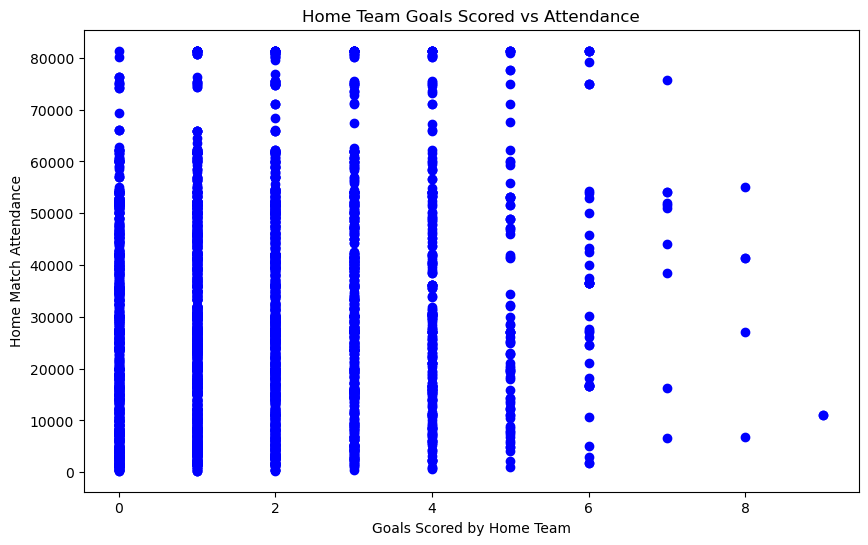

In [10]:
# Calculate average goals scored by home team
home_goals = df['home_club_goals']

# Calculate home match attendance
attendance_home = df['attendance']

# Compute correlation between goals scored and attendance at home matches
correlation = home_goals.corr(attendance_home)

# Display the result
print(f"Correlation between home team goals scored and home match attendance: {correlation}")

# Scatter plot to visualize the relationship
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(home_goals, attendance_home, color='blue')
plt.title('Home Team Goals Scored vs Attendance')
plt.xlabel('Goals Scored by Home Team')
plt.ylabel('Home Match Attendance')
plt.show()

#### The correlation coefficient of 0.132 suggests a weak positive correlation between home team goals and attendance.
#### Interpretation: Matches with higher goals scored by the home team tend to have slightly higher attendance, but the relationship is not strong.

## Using K-Nearest Neighbor (KNN) Classification
### Predicting Match Outcomes Based on Team Performance (Home vs. Away Goals)
### Business Question1: Can we predict whether the home team will win or lose based on the goals scored by both home and away teams?

Accuracy: 0.9978517722878625


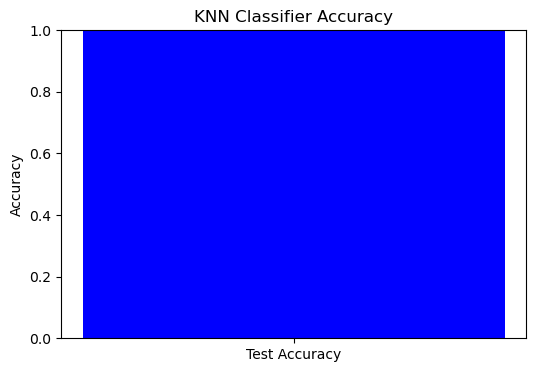

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns


# Define features and target
features = df[['home_club_goals', 'away_club_goals']]  # Goals scored by home and away teams
target = df['aggregate']  # Assuming 'aggregate' indicates match outcome (win/loss)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict the outcomes
y_pred = knn.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Visualize accuracy
fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(['Test Accuracy'], [accuracy], color='blue')
ax.set_ylim([0, 1])
ax.set_ylabel('Accuracy')
ax.set_title('KNN Classifier Accuracy')
plt.show() 

#### Interpretation:
#### The bar chart shows the overall test accuracy (99.79%), meaning the model correctly predicts almost all match outcomes based on input features.

### Predicting the Likelihood of a Player Scoring Based on Historical Data
### Business Question2: Can we predict if a player will score a goal based on previous performance data such as minutes played, assists, and goals?

Accuracy: 0.8979591836734694


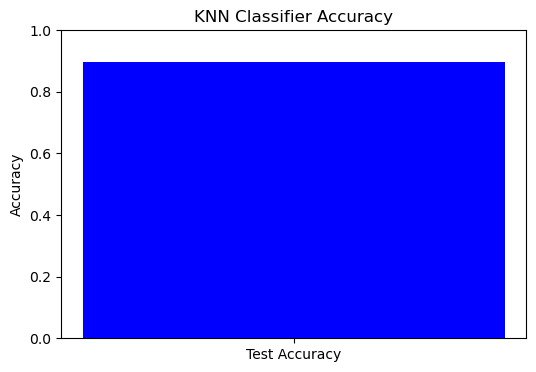

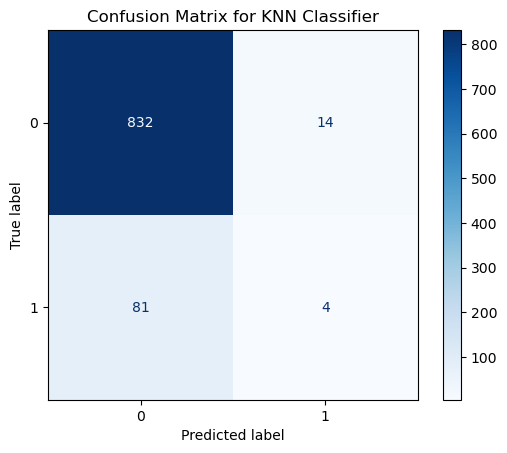

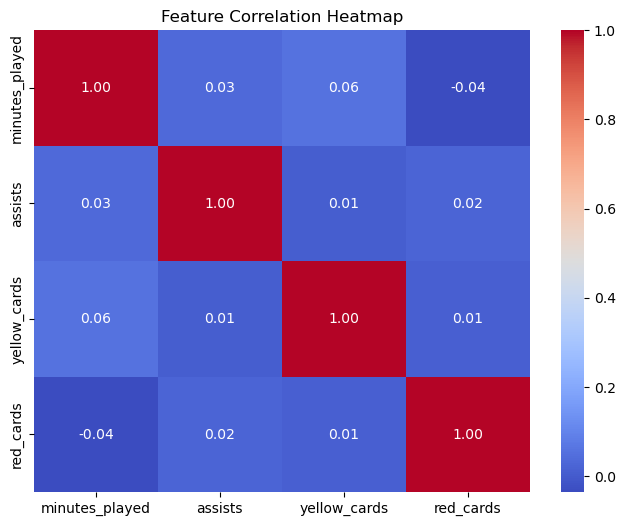

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

# Define features and target
features = df[['minutes_played', 'assists', 'yellow_cards', 'red_cards']]  # Player performance data
target = df['goal_scored']  # Target: whether the player scored a goal (1 = Yes, 0 = No)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict whether the player will score
y_pred = knn.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Visualize accuracy
fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(['Test Accuracy'], [accuracy], color='blue')
ax.set_ylim([0, 1])
ax.set_ylabel('Accuracy')
ax.set_title('KNN Classifier Accuracy')

plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot(cmap='Blues')
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

# Optional: Visualize correlations between features (helps understand the relationships)
corr = features.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Feature Correlation Heatmap')
plt.show()


## Interpretation of the Results
#### 1. Accuracy
#### The model achieved an accuracy of 89.8%, indicating that the KNN classifier correctly predicted whether a player would score a goal in almost 9 out of 10 cases.
#### 2. Confusion Matrix
#### The confusion matrix visualizes the model's performance in terms of True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN):
#### True Positives (TP): Players who scored a goal and were correctly predicted.
#### True Negatives (TN): Players who did not score a goal and were correctly predicted.
#### False Positives (FP): Players predicted to score a goal but did not.
#### False Negatives (FN): Players who scored a goal but were not predicted to do so.